# Credit Scoring
- Methodology leveraged by Financial Institutions to determine the risk of non payment associated with loans 
- Why is it used? 
    - Credit Scoring enables decision making at all customer lifecycle stages
    - Removes the need to manually examine each loan customer
    - Clear understanding of Denial or Approval reasons leading to sound business approach
- How is it used?
    - Credit Scores are used to determine the following areas under Loan portfolios
        - Approval – Should the Loan be approved?
        - Pricing – What is the right Interest ?
        - Cross Sell – Can we sell another loan ?
        - Refinance – Should there be a change in Interest?

## Credit Risk Prediction Project
- Objective: To predict the probability of default for a given customer
- Data: 
    - age: Age of the individual

    - ed: Education level (probably coded numerically)

    - employ: Years of employment

    - address: Years at current address

    - income: Annual income (possibly in $1,000s)

    - debtinc: Debt-to-Income ratio

    - creddebt: Credit card debt

    - othdebt: Other types of debt

    - default: Possibly a score or risk indicator for loan default

### Project Summary: Credit Default Prediction

- This project focuses on predicting whether an individual will **default on a loan** based on financial and demographic features such as age, income, employment history, debt-to-income ratio, etc.

- The dataset was preprocessed by:
  - Separating features and the target variable (`default`)
  - Splitting the data into **80% training and 20% testing**
  - Scaling the features using **StandardScaler** to improve model performance

- Three machine learning models were built and evaluated:
  1. **Random Forest Classifier** – Achieved an accuracy of approximately **82.1%**
  2. **Support Vector Machine (SVM)** – Tuned with `GridSearchCV`, also reached about **82.1% accuracy**
  3. **Logistic Regression** – Performed the best with an accuracy of **~83.6%**

- A **confusion matrix** was plotted to visualize the prediction results:
  - The models performed well in identifying **non-defaulters**
  - They were slightly less effective in identifying actual defaulters, indicating some **class imbalance** or sensitivity trade-off

- **Conclusion**: 
  - While all models performed well, **Logistic Regression** offered the best combination of **accuracy and interpretability**, making it a reliable choice for credit risk analysis.


In [1]:
import pandas as pd  # For data manipulation and analysis (e.g., reading CSVs, working with DataFrames)
import numpy as np  # For numerical operations, especially with arrays and math functions
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization with a high-level interface built on Matplotlib

from sklearn.ensemble import RandomForestClassifier  # A robust ensemble algorithm for classification using decision trees
from sklearn.svm import SVC  # Support Vector Classifier for powerful classification tasks
from sklearn.linear_model import LogisticRegression  # Logistic Regression for binary classification

from sklearn.metrics import confusion_matrix  # To evaluate model performance by summarizing prediction results
from sklearn.preprocessing import StandardScaler  # To standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
# train_test_split: Split data into training and testing sets
# cross_val_score: Perform cross-validation to evaluate model
# GridSearchCV: Search for the best hyperparameters using cross-validation

%matplotlib inline  
# Ensures plots display directly in Jupyter Notebook cells


In [2]:
df = pd.read_csv('bankloans.csv') # Load the dataset
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.isnull().sum() # check for missing values

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [4]:
df = df.dropna() # drop missing values

## Relationship Between Age and Income in Credit Risk Data
- The plot shows a general upward trend in income with age, reflecting increased earnings likely due to greater work experience or career advancement.

- Noticeable income fluctuations between ages 40 and 52 suggest possible outliers or variability in income levels within that age range.

- The shaded confidence interval highlights the degree of income variation at each age, providing valuable insight for credit risk modeling where age and income influence default likelihood.

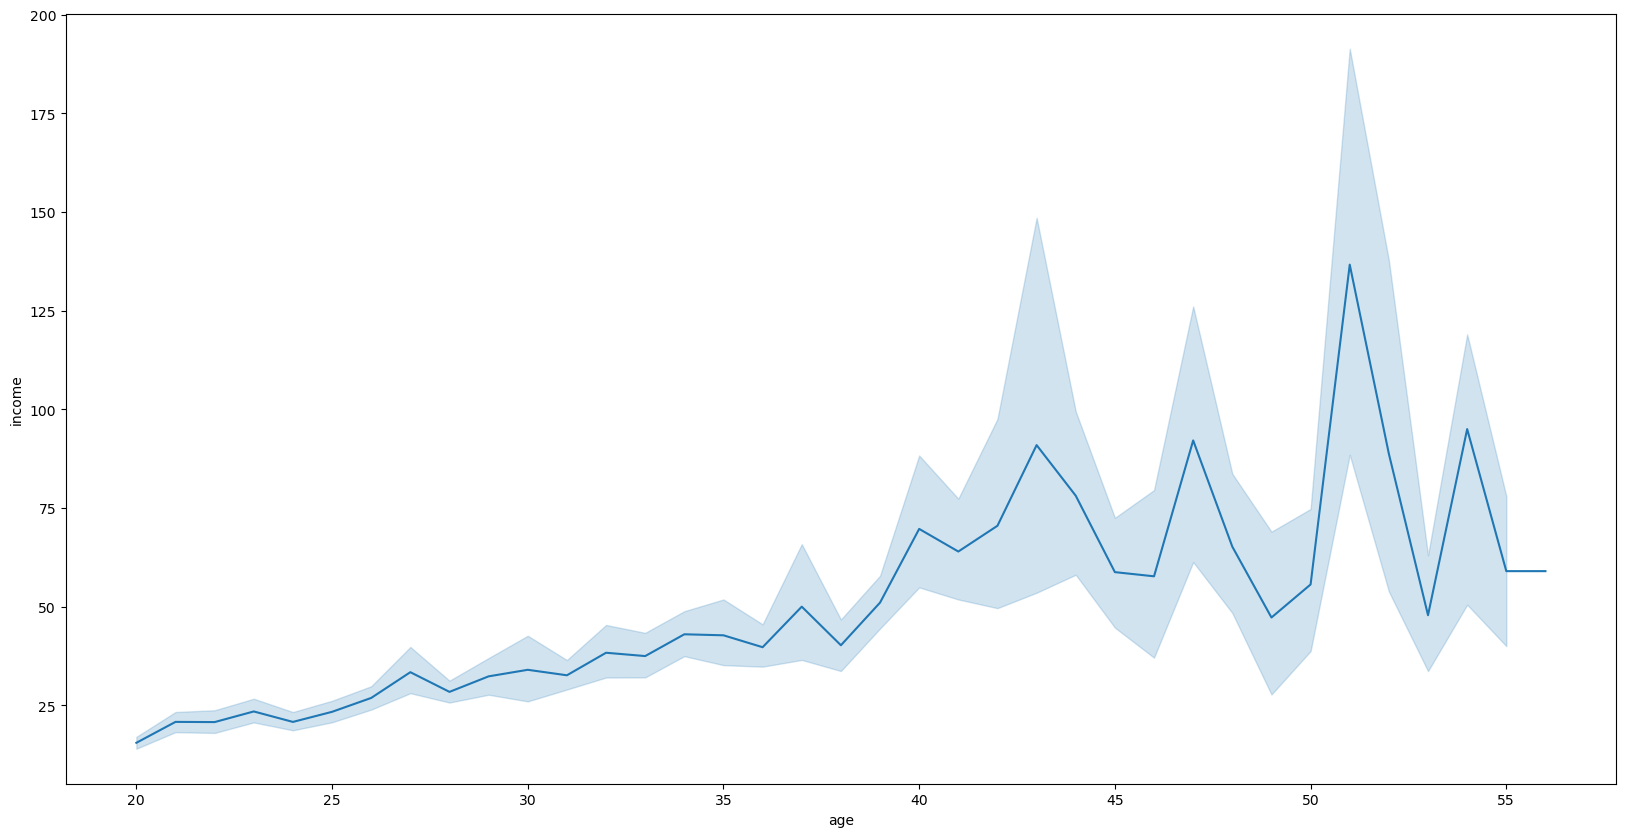

In [5]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='age', y='income', data=df, ax = ax)
plt.show()

## Relationship Between Age and Debt-to-Income Ratio
- The plot displays how the average debt-to-income ratio (debtinc) changes with age, remaining relatively stable between 9 and 13 for most age groups.

- A noticeable rise in variability and occasional spikes is observed among individuals over age 45, possibly due to inconsistent financial behavior or limited data.

- As debtinc is a key factor in credit assessment, these fluctuations across age groups can influence how credit risk is evaluated.

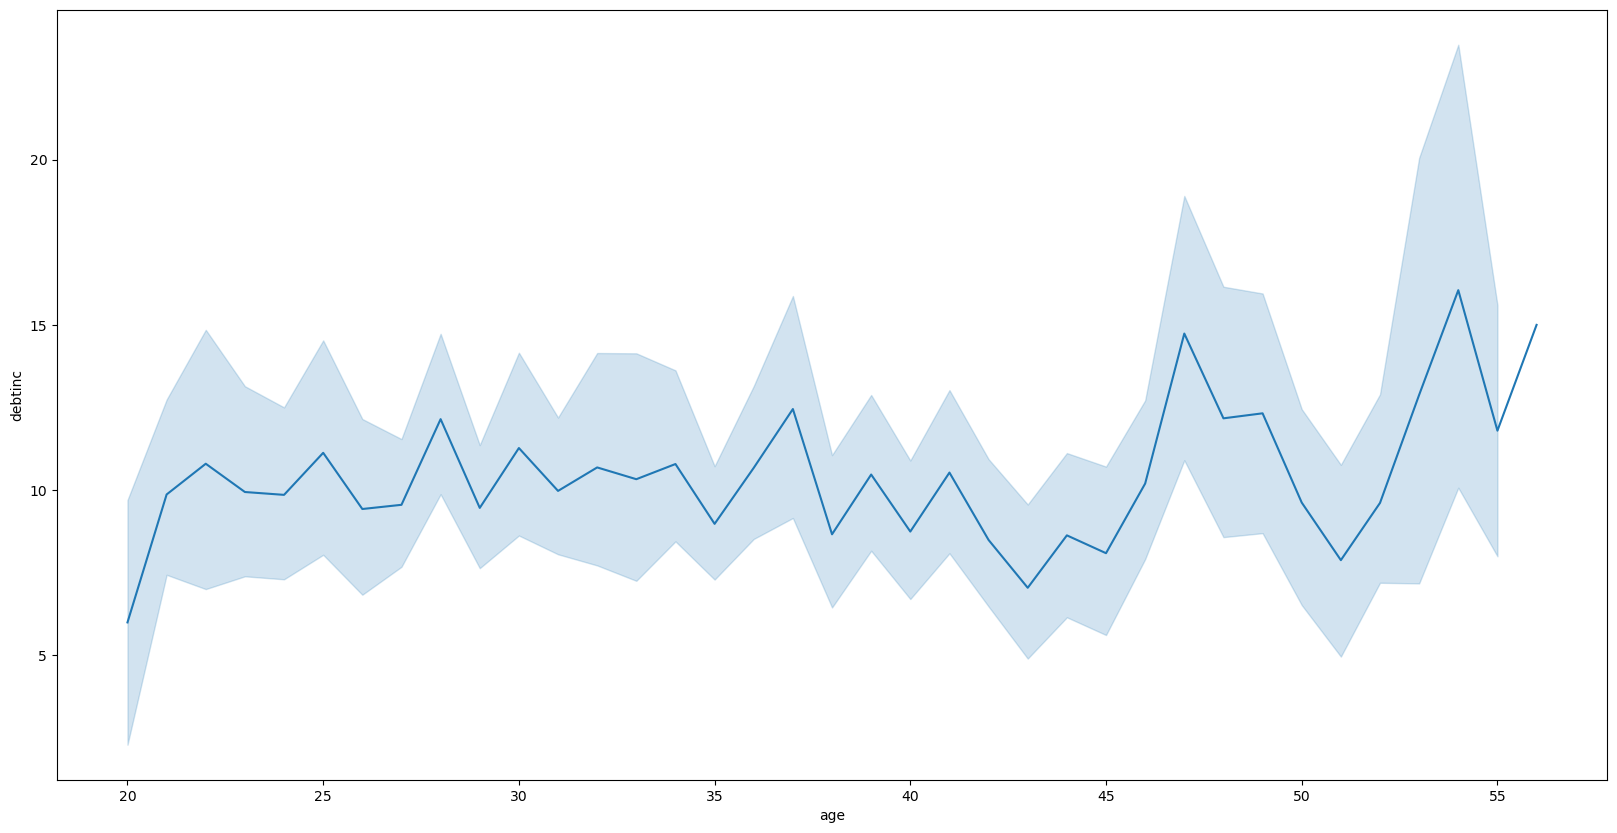

In [6]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='age', y='debtinc', data=df, ax = ax)
plt.show()

## Predicting the Number of Loan Defaults in the Credit Risk Dataset

In [7]:
df['default'].value_counts() # count of default

default
0.0    517
1.0    183
Name: count, dtype: int64

### Splitting the Dataset into Training and Testing Sets

- To evaluate model performance effectively, the dataset can be split in one of the following ways:
    - 70% for training and 30% for testing – A common split that balances training data volume with a robust test set for evaluation.
    - 80% for training and 20% for testing – Useful when more training data is preferred to potentially improve model learning, while still retaining a reasonable test set for validation.

In [8]:
x = df.drop(['default'], axis=1)  # Features: all columns except the target variable 'default'
y = df['default']  # Target: the 'default' column, which we're trying to predict

# Split the data into training and testing sets:
# - 20% of the data will be used for testing
# - 80% will be used for training
# - random_state=42 ensures reproducibility by providing a fixed random split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Scaling the Data

* **All features should be scaled to the same range** to ensure that no single variable dominates the model due to its larger scale. This is especially important for algorithms that rely on distance or gradient calculations (e.g., SVM, logistic regression).
* **StandardScaler is used for scaling**, which standardizes the data by removing the mean and scaling to unit variance (i.e., resulting in a distribution with a mean of 0 and a standard deviation of 1). This makes the data more suitable for many machine learning models.


In [9]:
sc = StandardScaler() # standardize the data
x_train = sc.fit_transform(x_train) # fit the data
x_test = sc.fit_transform(x_test) # fit the data

# Building the Machine Learning Model


## Model 1: Random Forest Classifier


In [10]:
rfc = RandomForestClassifier(n_estimators=200)  # Create a Random Forest model with 200 decision trees
rfc.fit(x_train, y_train)  # Train the model using the training data

RandomForestClassifier(n_estimators=200)

- score(): Returns the accuracy of the model — i.e., the percentage of correct predictions on the test set.

- Output: 0.8214, meaning the model correctly predicted defaults about 82.14% of the time.

In [11]:
rfc.score(x_test, y_test)  # Evaluate the model on the test data

0.8

To be sure our model is not overfitting we will use cross validation
- Cross-validation helps ensure that the model's performance is consistent and not just a result of how the data was split.
- It reduces the risk of overfitting and gives a more accurate picture of how the model might perform on unseen data.

This runs 10-fold cross-validation on the training data.
It splits x_train and y_train into 10 subsets.
The model is trained on 9 subsets and tested on the 1 remaining, repeating this process 10 times (once for each subset).
rfc2 stores the accuracy scores from each fold.

- Mean : The output (~0.7839 or 78.39%) is the mean cross-validation score, giving a more generalizable estimate of the model's performance than a single train-test split.

In [12]:
rfc2 = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=10) # cross validation score(cv = how many times we want to split the data)
rfc2.mean() # mean of the cross validation score

np.float64(0.7857142857142857)

## Model 2 : SVM Model
- The goal is to build a second machine learning model (Model 2) for predicting credit default, using SVM instead of the previously used Random Forest. This allows comparison between different algorithms to see which performs better on the task.

In [13]:
sv = SVC()  # Initializes an SVM model with default parameters
sv.fit(x_train, y_train)  # Trains the SVM model on the training data

SVC()

In [14]:
sv.score(x_test, y_test) # score the model

0.7928571428571428

GridSearchCV searches for the best combination of hyperparameters for the SVM model.
- C: Controls regularization strength (lower = more regularization).
- gamma: Defines how far the influence of a single training example reaches.
- kernel: Specifies the type of kernel function ('rbf' or 'linear').
- cv=10: Performs 10-fold cross-validation for reliable accuracy estimates.

In [15]:
model = GridSearchCV(sv, {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
    'gamma': [0.1, 0.4, 0.8, 1, 2, 3],
    'kernel': ['rbf','linear']
}, scoring = 'accuracy', cv = 10)

In [16]:
model.fit(x_train, y_train) # fit the model

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
                         'gamma': [0.1, 0.4, 0.8, 1, 2, 3],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

### This tuning process helps ensure the SVM model performs as well as possible by selecting the best parameter combination, rather than relying on defaults.

In [17]:
model.best_params_ # best parameters

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

### This fine-tuned SVM model achieves an accuracy of 82.14% on the test set.

In [18]:
model2 = SVC(C=0.1, gamma=0.1, kernel='linear')  # Uses best parameters found earlier
model2.fit(x_train, y_train)  # Train the SVM model on the training data
model2.score(x_test, y_test)  # Evaluate the model on the test data

0.8214285714285714

## Model 3 : Logistic Regression
- Perfect for binary classification: It is specifically designed to predict outcomes like default vs. no default.
- Highly interpretable: The model’s coefficients help understand the influence of each feature on the prediction.
- Fast and efficient: It trains quickly and performs well on scaled data, making it ideal for baseline comparisons.

The Logistic Regression model scores 83.57% on the test set — slightly higher than the SVM.
- This suggests that the Logistic Regression model is slightly better at predicting credit default in this dataset.

### When to Avoid It?
- If the relationship between features and the target is highly non-linear, other models like Random Forest or SVM might capture patterns better.

In [19]:
lr = LogisticRegression() # logistic regression
lr.fit(x_train, y_train) # fit the model
lr.score(x_test, y_test) # score the model

0.8357142857142857

- Uses the trained logistic regression model to make predictions (yp) on the unseen test set.
- Compares actual values (y_test) with predicted values (yp) and outputs a 2x2 matrix showing:
    - True Negatives (TN): Correctly predicted non-defaults
    - False Positives (FP): Incorrectly predicted defaults
    - False Negatives (FN): Missed actual defaults
    - True Positives (TP): Correctly predicted defaults
- Visualizes the confusion matrix with color intensity indicating frequency (light = higher count, dark = lower count).

### 📊 Why It’s Useful:
It shows how well the model distinguishes between defaulters and non-defaulters.

Helps analyze model performance beyond accuracy, such as identifying bias toward one class.

### Confusion Matrix Interpretation

- The confusion matrix shows how well the logistic regression model classified defaulters and non-defaulters.
- Most predictions fall in the top-left cell, meaning the model correctly identified many non-defaulters.
- The bottom-right cell is darker, indicating fewer correctly predicted defaulters.
- The model made some mistakes: it predicted a few defaulters as non-defaulters and vice versa.
- This suggests the model is better at detecting non-defaulters and may struggle slightly with identifying actual defaulters.
- The imbalance in prediction could be due to more non-defaulters in the dataset.

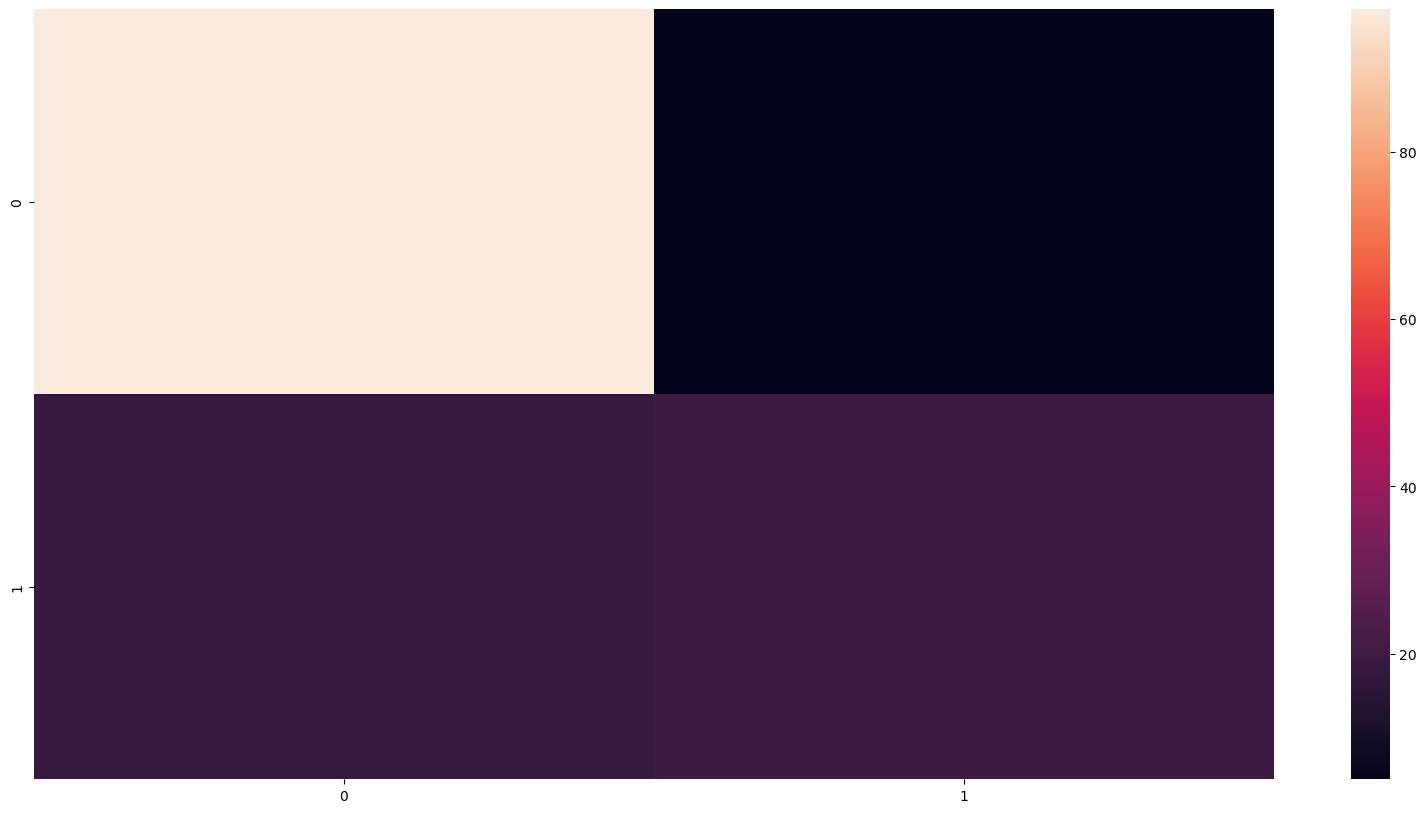

In [20]:
yp = lr.predict(x_test)  # Predicts the target values using the test data
c = confusion_matrix(y_test, yp)  # Creates the confusion matrix
fig, ax = plt.subplots(figsize=(20, 10))  # Sets figure size
sns.heatmap(c, ax=ax)  # Plots the confusion matrix as a heatmap
plt.show()  # Displays the heatmap